### No data visualizations done , this is to see simple example of filling missing values and encoding.

Load data

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Luminar /HEART')
print (df)
print( df.head(),"\nColumns: ", df.columns,"\n", df.tail(), "\n Shape: ", df.shape)

     Age Sex ChestPainType RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA       140          289          0     Normal   
1     49   F           NAP       160          180          0     Normal   
2     37   M           ATA       130          283          0          ?   
3     48   F           ASY       138          214          0          ?   
4     54   M           NAP       150          195          0     Normal   
..   ...  ..           ...       ...          ...        ...        ...   
913   45   M            TA       110          264          0     Normal   
914   68   M           ASY       144          193          1     Normal   
915   57   M           ASY       130          131          0     Normal   
916   57   F           ATA       130          236          0        LVH   
917   38   M           NAP       138          175          0     Normal   

     MaxHR ExerciseAngina  HeartDisease  Oldpeak ST_Slope  
0      172              N             0

Find missing values and datatypes

In [ ]:
df.isna().sum()


Age               0
Sex               9
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
HeartDisease        int64
Oldpeak           float64
ST_Slope           object
dtype: object

Fill missing value

In [ ]:
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
Oldpeak           0
ST_Slope          0
dtype: int64

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['ChestPainType']=lb.fit_transform(df['ChestPainType'])
df['RestingBP']=lb.fit_transform(df['RestingBP'])
df['RestingECG']=lb.fit_transform(df['RestingECG'])
df['ExerciseAngina']=lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] =lb.fit_transform(df['ST_Slope'])
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
HeartDisease        int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [ ]:
y=df['HeartDisease']
y.ndim

1

In [ ]:
x=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak',
       'ST_Slope']]
print(x.ndim)
x

2


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,35,289,0,2,172,0,0.0,2
1,49,0,2,49,180,0,2,156,0,1.0,1
2,37,1,1,25,283,0,0,98,0,0.0,2
3,48,0,0,33,214,0,0,108,1,1.5,1
4,54,1,2,43,195,0,2,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,8,264,0,2,132,0,1.2,1
914,68,1,0,39,193,1,2,141,0,3.4,1
915,57,1,0,25,131,0,2,115,1,1.2,1
916,57,0,1,25,236,0,1,174,0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
print(x_train)
x_test

[[ 0.87491238  0.5515048  -0.79508121 ...  1.18457832  1.86146278
  -0.60853308]
 [ 0.45783757  0.5515048   1.33946113 ... -0.84418225 -0.83198664
  -0.60853308]
 [ 0.04076276 -1.81322083  1.33946113 ...  1.18457832 -0.83198664
  -0.60853308]
 ...
 [ 0.66637498  0.5515048  -0.79508121 ...  1.18457832  0.42495642
   1.07837723]
 [ 0.66637498  0.5515048  -0.79508121 ...  1.18457832 -0.83198664
   1.07837723]
 [-1.41899906 -1.81322083 -0.79508121 ... -0.84418225  0.96364631
  -0.60853308]]


array([[ 0.97918108, -1.81322083,  0.27218996, ..., -0.84418225,
        -0.83198664,  1.07837723],
       [-0.06350594,  0.5515048 ,  1.33946113, ..., -0.84418225,
        -0.83198664, -0.60853308],
       [ 1.18771848,  0.5515048 , -0.79508121, ..., -0.84418225,
         0.24539313, -0.60853308],
       ...,
       [-1.94034257,  0.5515048 , -0.79508121, ...,  1.18457832,
         0.24539313, -0.60853308],
       [ 0.24930017,  0.5515048 , -0.79508121, ...,  1.18457832,
         0.96364631, -0.60853308],
       [ 0.35356887,  0.5515048 , -0.79508121, ..., -0.84418225,
        -0.83198664,  1.07837723]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

Confusion Matix:
 [[117  14]
 [ 29 162]]
Accuracy=  86.64596273291926


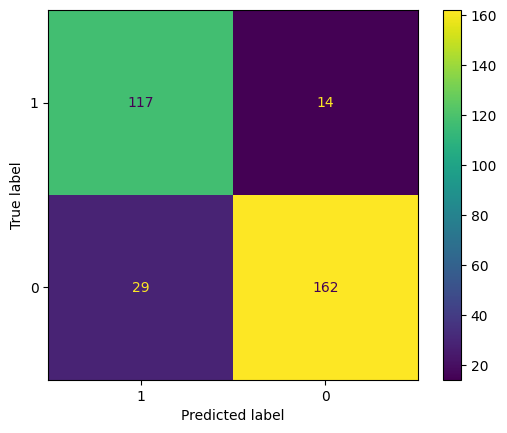

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matix:\n", cm)
score=accuracy_score(y_test,y_pred)
print("Accuracy= ", score*100)

labels=['1', '0']
cmd=ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       131
           1       0.92      0.85      0.88       191

    accuracy                           0.87       322
   macro avg       0.86      0.87      0.86       322
weighted avg       0.87      0.87      0.87       322

